In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("heart_disease_uci - heart_disease_uci.csv")

In [5]:
df.head(2)


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2


In [7]:
df.tail(2)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0
919,920,62,Male,VA Long Beach,atypical angina,120.0,254.0,False,lv hypertrophy,93.0,True,0.0,NaN,NaN,NaN,1


In [11]:
df.shape

(920, 16)

In [13]:
df.dtypes

id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [17]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [19]:
missing = df.isnull().sum()

missing[missing > 0].sort_values(ascending=False).head()

ca         611
thal       486
slope      309
fbs         90
oldpeak     62
dtype: int64

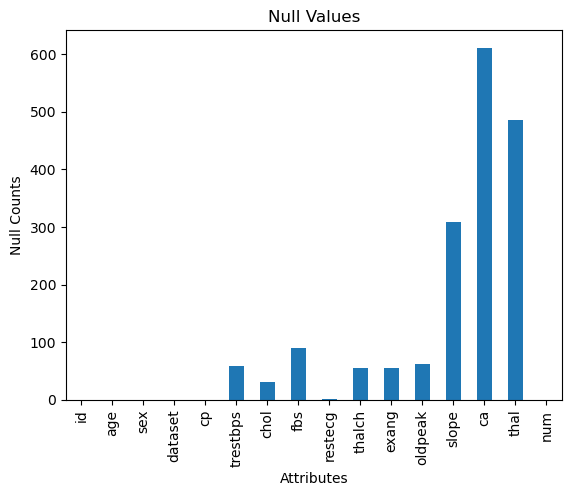

In [21]:
df.isnull().sum().plot(kind='bar')
plt.title("Null Values")
plt.xlabel("Attributes")
plt.ylabel("Null Counts")
plt.show()

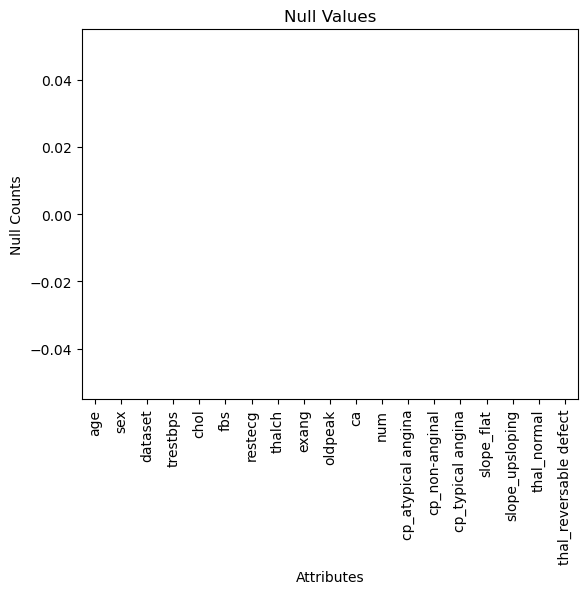

In [53]:
df.isnull().sum().plot(kind='bar')
plt.title("Null Values")
plt.xlabel("Attributes")
plt.ylabel("Null Counts")
plt.show()

In [87]:
numeric_df = df.select_dtypes(include=np.number)
median_values = numeric_df.median()
df.fillna(median_values, inplace=True)

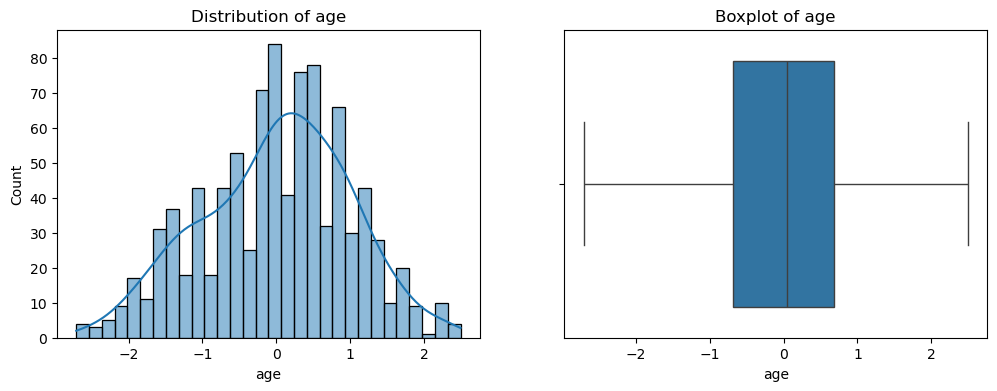

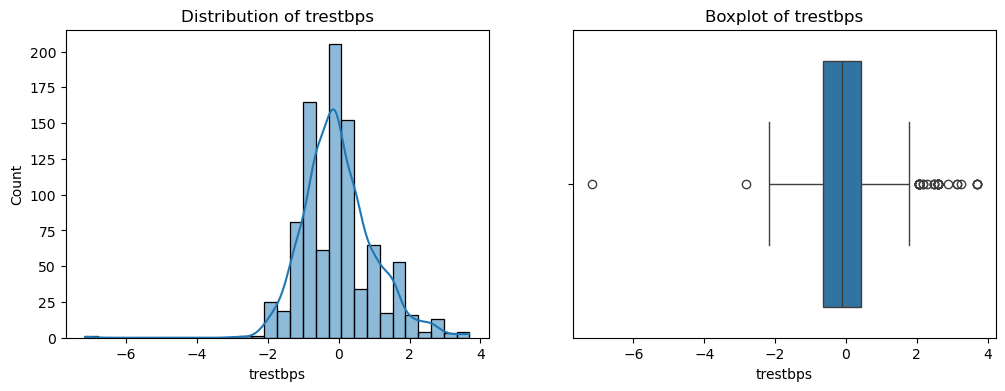

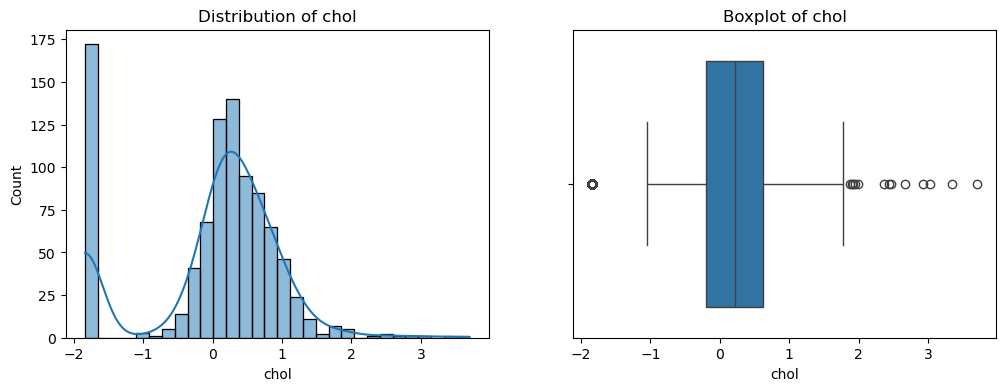

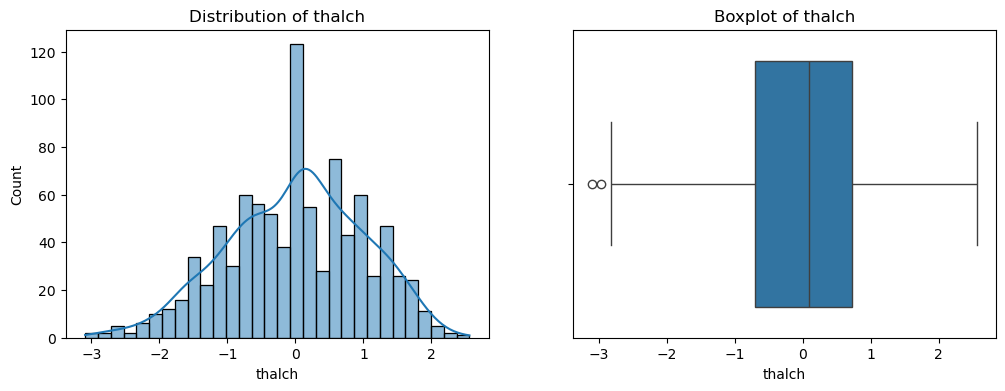

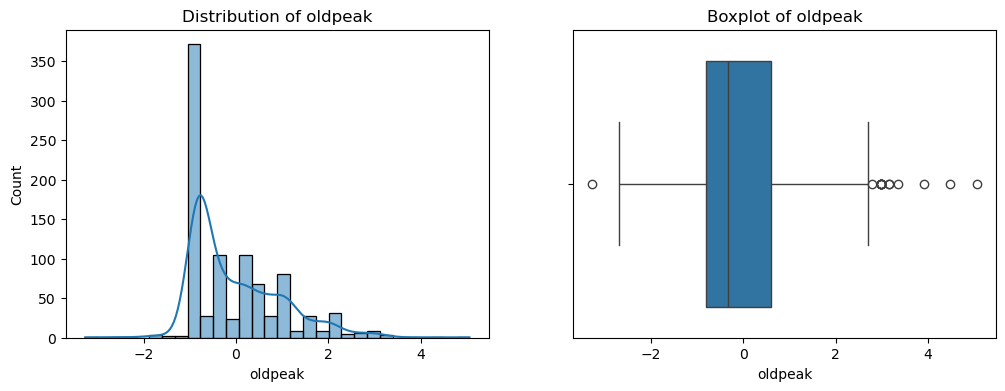

In [89]:
num_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
for col in num_cols:
    plt.figure(figsize=(12, 4))


    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')


    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

    plt.show()

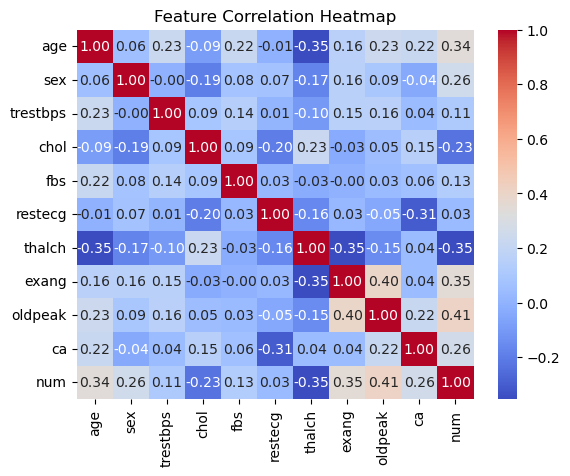

In [91]:
df_numeric = df.select_dtypes(include=['number'])  # Select only numerical columns
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

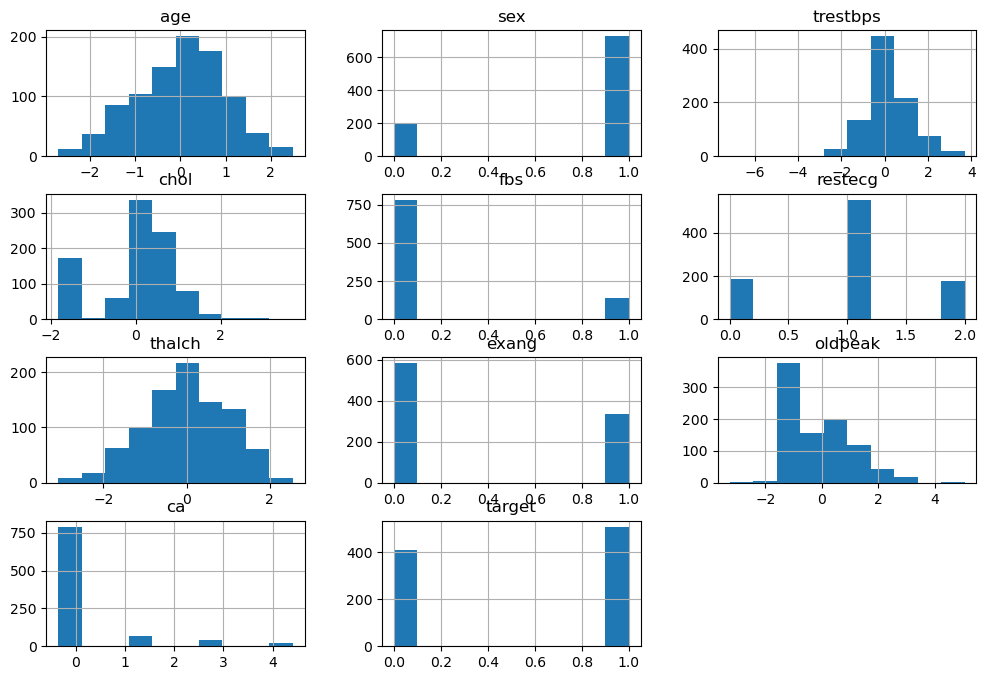

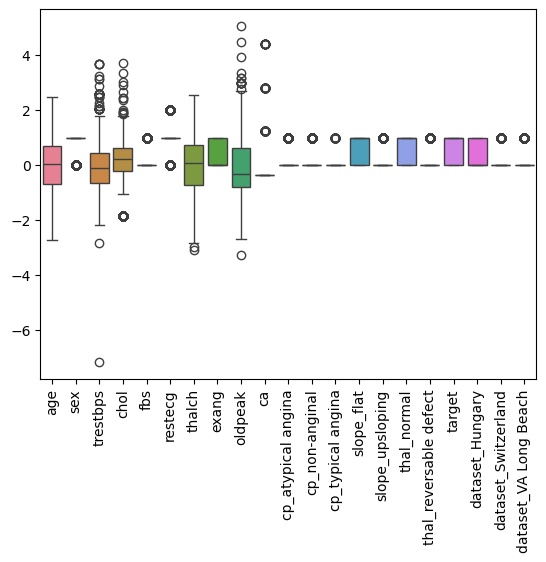

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(figsize=(12, 8))  # Histogram of all numerical features
plt.show()

sns.boxplot(data=df)  # Boxplot to detect outliers
plt.xticks(rotation=90)
plt.show()

In [93]:
df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)
df.drop('num', axis=1, inplace=True)

In [99]:
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    df[col] = df[col].astype('category')


In [101]:
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [103]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


In [107]:
X = df.drop(['id', 'dataset', 'target'], axis=1, errors='ignore')
y = df['target']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [137]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Reds")
    plt.title("Confusion Matrix")
    plt.show()


Logistic Regression Evaluation:
Accuracy: 0.8206521739130435
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.80      0.78        75
           1       0.86      0.83      0.85       109

    accuracy                           0.82       184
   macro avg       0.81      0.82      0.82       184
weighted avg       0.82      0.82      0.82       184



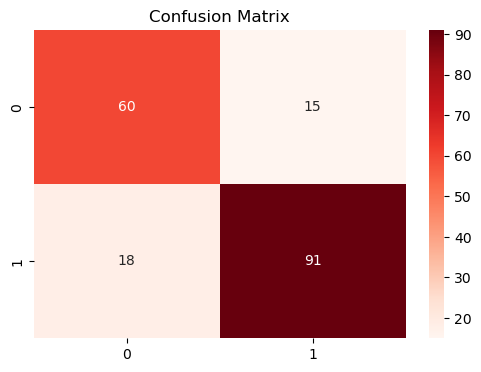

In [141]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
print("Logistic Regression Evaluation:")
evaluate_model(lr, X_test, y_test)

Decision Tree Evaluation:
Accuracy: 0.7445652173913043
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.76      0.71        75
           1       0.82      0.73      0.77       109

    accuracy                           0.74       184
   macro avg       0.74      0.75      0.74       184
weighted avg       0.75      0.74      0.75       184



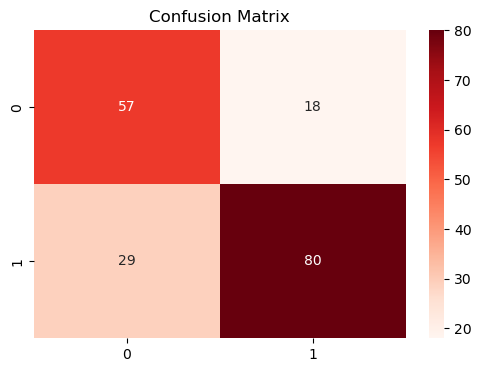

In [142]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
print("Decision Tree Evaluation:")
evaluate_model(dt, X_test, y_test)


Random Forest Evaluation:
Accuracy: 0.8478260869565217
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        75
           1       0.89      0.85      0.87       109

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.85      0.85       184



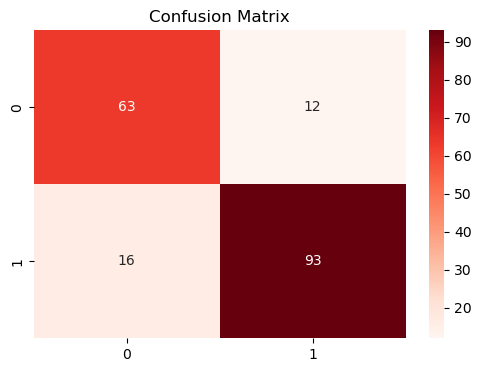

In [145]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
print("Random Forest Evaluation:")
evaluate_model(rf, X_test, y_test)


SVM Evaluation:
Accuracy: 0.8586956521739131
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        75
           1       0.89      0.87      0.88       109

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.86      0.86       184



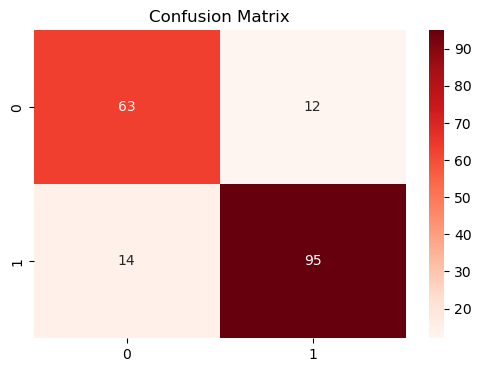

In [146]:
from sklearn.svm import SVC
svm = SVC(probability=True, random_state=42)
svm.fit(X_train, y_train)
print("SVM Evaluation:")
evaluate_model(svm, X_test, y_test)

XGBoost Evaluation:
Accuracy: 0.8478260869565217
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        75
           1       0.89      0.85      0.87       109

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.85      0.85       184



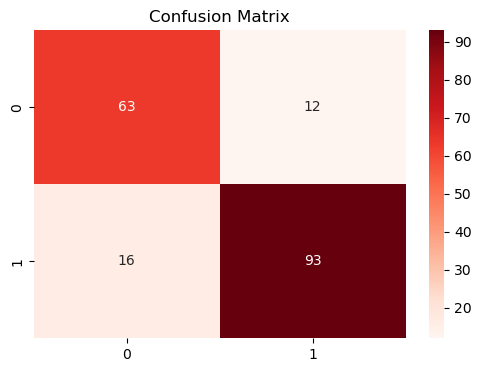

In [149]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train, y_train)
print("XGBoost Evaluation:")
evaluate_model(xgb_clf, X_test, y_test)

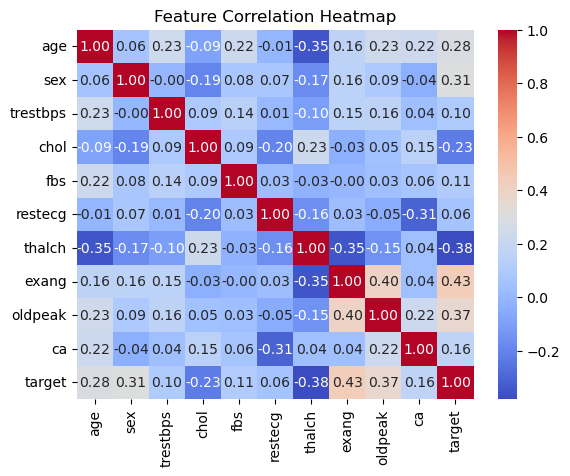

In [159]:
df_numeric = df.select_dtypes(include=['number'])  # Select only numerical columns
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()